In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../input/fraud-detection/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
dataset.shape

(284807, 31)

In [9]:
X = dataset.iloc[:,:-1].values
X.shape

(284807, 30)

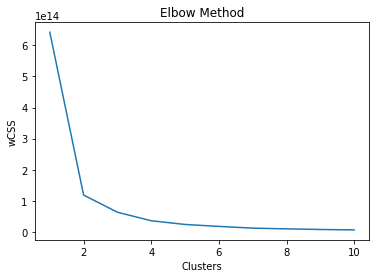

In [19]:
#Elbow method to optimize number of clusters
from sklearn.cluster import KMeans
wCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
    kmeans.fit(X)
    wCSS.append(kmeans.inertia_)
plt.plot(range(1,11), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

In [24]:
#Applying KMeans to data
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
y_kmeans=kmeans.fit_predict(X)


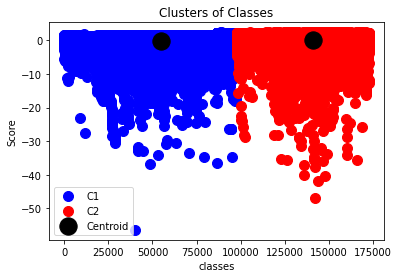

In [22]:
#Visualizing clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100, c='blue', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=100, c='red', label = 'C2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='black', label = 'Centroid')
plt.title('Clusters of Classes')
plt.xlabel('classes')
plt.ylabel('Score')
plt.legend()
plt.show()